# ML - Multiple Linear Regression Model (Part II).
- Prepared by - Sagun Shakya.
    - MSc. Data Science.
    - GITAM Institute of Science, Visakhapatnam.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(r'D:\Sagun Shakya\Python\Data Sets')

In [3]:
land = pd.read_csv('real_estate.csv')
land.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [4]:
land.isnull().sum()

price    0
size     0
year     0
dtype: int64

In [5]:
land.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


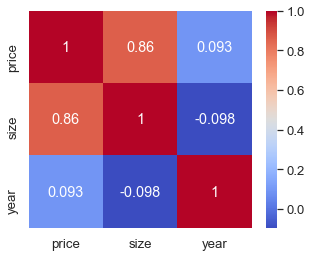

In [6]:
col_vals = land.corr().columns.values

plt.figure(figsize = (5,4))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(data=land.corr(), xticklabels=col_vals, yticklabels=col_vals, cmap = 'coolwarm', annot = True)
plt.show()

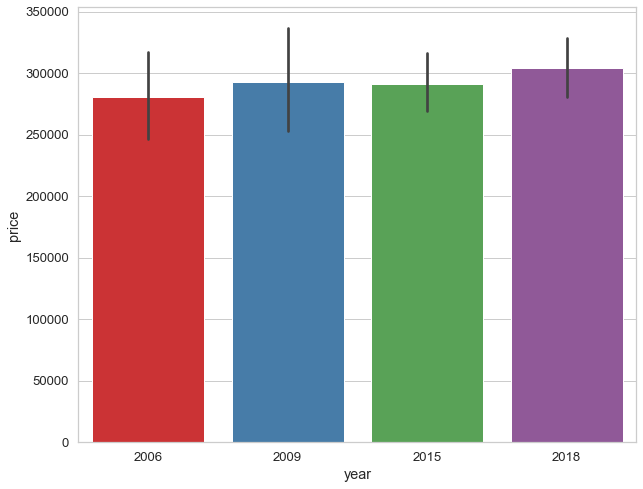

In [7]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.barplot(x= land.year, y = land.price, palette = 'Set1')
plt.show()

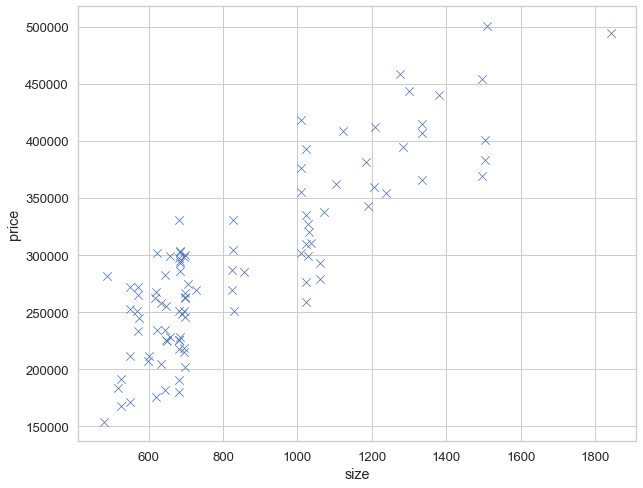

In [8]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.scatterplot(x= land['size'], y = land.price, marker = 'x', s = 70)
plt.show()

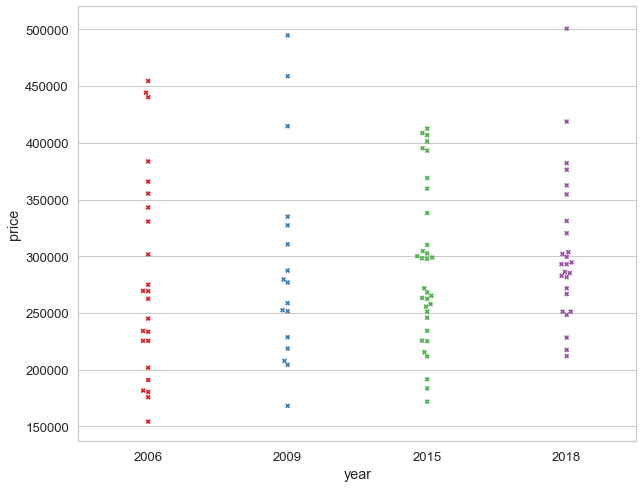

In [9]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(x= land.year, y = land.price, palette = 'Set1', marker = 'X')
plt.show()

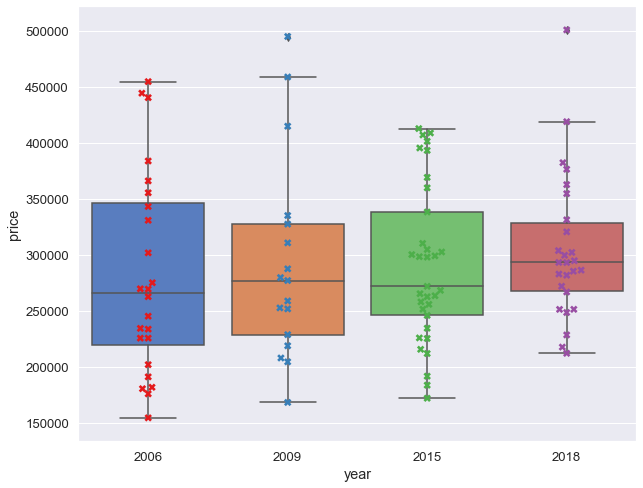

In [10]:
plt.figure(figsize = (10,8))
sns.set(style = 'darkgrid', font_scale = 1.2) 

sns.boxplot(y = land['price'], x = land['year'], palette = 'muted')
sns.swarmplot(x= land.year, y = land.price, palette = 'Set1', marker = 'X', s = 7.5)
plt.show()

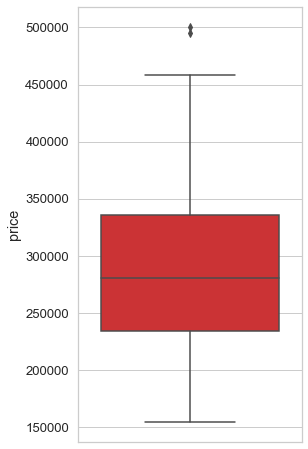

In [11]:
plt.figure(figsize = (4,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.boxplot(y = land.price, palette = 'Set1')
plt.show()

### Detection and removal of outliers:

In [12]:
q1 = land['price'].quantile(1/4)
q3 = land['price'].quantile(3/4)
IQR = q3 - q1
lowerLimit = q1 - 1.5 * IQR
upperLimit = q3 + 1.5 * IQR

In [13]:
pricing = land['price']

# Only those values lying outside the interval are labelled as index_outliers.
# And, their index values are taken.

index_outliers = pricing[ pricing.between(lowerLimit,upperLimit) == False].index.values
print(index_outliers)

[11 55]


In [14]:
land.drop(index_outliers, axis = 0, inplace = True)    

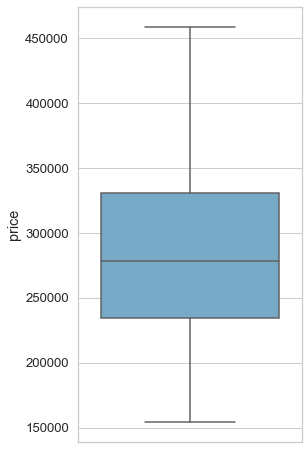

In [15]:
plt.figure(figsize = (4,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.boxplot(y = land.price, palette = 'Blues')
plt.show()

#### As we can see, there are no outliers left.

### Checking for correlation once again after removing the outliers:

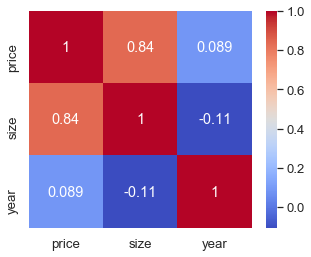

In [16]:
col_vals = land.corr().columns.values

plt.figure(figsize = (5,4))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(data=land.corr(), xticklabels=col_vals, yticklabels=col_vals, cmap = 'coolwarm', annot = True)
plt.show()

## Multiple Regression Analysis:

### Case I: Using all of the data as a training set.

In [17]:
Y = land['price']
X = land[['size', 'year']]

In [18]:
model = LinearRegression()

model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Checking the weights and intercepts values.
print('Weight values: ', model.coef_.round(4), '\nIntercept: ', model.intercept_.round(4))

Weight values:  [ 225.1564 2772.4462] 
Intercept:  -5479961.3056


In [20]:
model.predict([[1500,2015], [1500,2019], [1500,2020]]).round(2)

array([444252.45, 455342.23, 458114.68])

### Testing the significance of the results.

##### First we take a different approach to view the statistical summary of the test i.e statsmodel.
 - Note: sklearn is helpful for finding indivisual scores.

In [27]:
import statsmodels.api as sm

In [33]:
Y = land['price']
X = land[['size', 'year']]
X = sm.add_constant(X)

model1 = sm.OLS(Y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.06e-28
Time:                        15:25:11   Log-Likelihood:                -1168.1
No. Observations:                  98   AIC:                             2342.
Df Residuals:                      95   BIC:                             2350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.48e+06    1.6e+06     -3.417      0.001   -8.66e+06    -2.3e+06
size         225.1564     13.684     16.454      0.000     197.990     252.323
year        2772.4462    796.144      3.482      0.001    1191.901    4352.992
==============================================================================
Omnibus:                        9.601   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.633
Skew:                           0.119   Prob(JB):                        0.163
Kurtosis:                       2.087   Cond. No.                     9.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remarks:
- Prob(F - statistic) = 1.06e-28 is a very lower value as compared to $\alpha$ = 0.05. So, we reject the null hypothesis that all of the weights/coefficients are equal to zero.
    - H$_o$ : All of the weights/coefficients are equal to zero.
    - H$_1$ : At least on of the weights/coefficients is not equal to zero.
    
- Degrees of freedom: f ~ F(2,95).
- The indivisual p - values i.e P>|t| is also very lower than $\alpha$ = 0.05. This means that, indivisually speaking, the features are quite significant to determine the response variable.

## Below is a very important trick to store the summary objects in a dataframe.


In [36]:
import statsmodels.api as sm

mymodel = sm.OLS(Y,X)
results = mymodel.fit()           # 'results' store the summary object.

### Using dir() method to get all the atrributes of the object results.

In [46]:
def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))
    
print(dump(results))

obj.HC0_se = const    1.608260e+06
size     1.518223e+01
year     7.987765e+02
dtype: float64
obj.HC1_se = const    1.633456e+06
size     1.542009e+01
year     8.112908e+02
dtype: float64
obj.HC2_se = const    1.638910e+06
size     1.560235e+01
year     8.139886e+02
dtype: float64
obj.HC3_se = const    1.670347e+06
size     1.603842e+01
year     8.295908e+02
dtype: float64
obj._HCCM = <bound method RegressionResults._HCCM of <statsmodels.regression.linear_model.OLSResults object at 0x0000021EC20BF2B0>>
obj.__class__ = <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
obj.__delattr__ = <method-wrapper '__delattr__' of RegressionResultsWrapper object at 0x0000021EC21ABFD0>
obj.__dict__ = {'_results': <statsmodels.regression.linear_model.OLSResults object at 0x0000021EC20BF2B0>, '__doc__': '\n    Results class for for an OLS model.\n\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods that are only available for OLS a

#### Estimated sum of squares:

In [48]:
results.ess

372352442855.9922

#### F Statistic P - value and f - value:

In [57]:
results.f_pvalue,results.fvalue

(1.0630201397628987e-28, 136.83530657343707)

#### Fitted values:

In [58]:
results.fittedvalues.head()

0    251313.672930
1    237635.299155
2    224551.643862
3    445321.940026
4    377061.150786
dtype: float64

#### P - values:

In [37]:
results.pvalues

const    9.325403e-04
size     1.471793e-29
year     7.530334e-04
dtype: float64

#### Coefficients:

In [38]:
results.params

const   -5.479961e+06
size     2.251564e+02
year     2.772446e+03
dtype: float64

#### Confidence Interval:

In [40]:
results.conf_int()

,0,1
const,-8.663478e+06,-2.296445e+06
size,1.979897e+02,2.523231e+02
year,1.191901e+03,4.352992e+03


In [41]:
# Lower limit.
results.conf_int()[0]

const   -8.663478e+06
size     1.979897e+02
year     1.191901e+03
Name: 0, dtype: float64

In [42]:
# Upper limit.
results.conf_int()[1]

const   -2.296445e+06
size     2.523231e+02
year     4.352992e+03
Name: 1, dtype: float64

In [59]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.06e-28
Time:                        16:04:29   Log-Likelihood:                -1168.1
No. Observations:                  98   AIC:                             2342.
Df Residuals:                      95   BIC:                             2350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.48e+06    1.6e+06     -3.417      0.001   -8.66e+06    -2.3e+06
size         225.1564     13.684     16.454      0.000     197.990     252.323
year        2772.4462    796.144      3.482      0.001    1191.901    4352.992
==============================================================================
Omnibus:                        9.601   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.633
Skew:                           0.119   Prob(JB):                        0.163
Kurtosis:                       2.087   Cond. No.                     9.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# Creating a function that converts the summary object into a dataframe.

def global_summary_to_dataframe(results):
    myData = dict()
    
    # Number of observations:
    myData['num_observations'] = results.nobs
    myData['num_residuals'] = results.df_resid
    myData['degrees_of_freedom'] = results.df_model
        
    # Coefficient of determination:
    myData['r_squared'] = results.rsquared
    myData['r_squared_adjusted'] = results.rsquared_adj
    
    # Sum of squares:
    myData['explained_sumOFsquares'] = results.ess
    myData['residual_sumOFsquares'] = results.ssr
    myData['total_sumOFsquares'] = results.ess + results.ssr
    
    # Mean sum of squares:
    myData['mse_model'] = results.mse_model
    myData['mse_residue'] = results.mse_resid
    myData['mse_total'] = results.mse_total
    
    # F - statistic:
    myData['f_pvalue'] = results.f_pvalue
    myData['f_value'] = results.fvalue
    
    #Log - likelihood functional value.
    myData['log_likelihood'] = results.llf
    
    temp = pd.DataFrame(myData, index = np.arange(1))
    temp1 = temp.transpose()
    temp1.columns = ['Values']
    temp1.style.format("{:.1f}")
    return temp1

Data = global_summary_to_dataframe(results)
Data
    
    
    
    

,Values
num_observations,9.800000e+01
num_residuals,9.500000e+01
degrees_of_freedom,2.000000e+00
r_squared,7.423174e-01
r_squared_adjusted,7.368925e-01
explained_sumOFsquares,3.723524e+11
residual_sumOFsquares,1.292557e+11
total_sumOFsquares,5.016081e+11
mse_model,1.861762e+11
mse_residue,1.360586e+09


In [95]:
type(float(results.ess))

float

### Case II: Using 75% of the data as a training set.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [22]:
newModel = LinearRegression()

newModel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Checking the weights and intercepts values.
print('Weight values: ', newModel.coef_, '\nIntercept: ', newModel.intercept_)

Weight values:  [ 218.71705612 2648.08659193] 
Intercept:  -5225830.271680301


In [24]:
# Prediction.
y_predicted = newModel.predict(x_test)

#### Residuals.

In [25]:
error = y_test - y_predicted
print(error)

64    42403.005318
41   -49762.145537
96   -10558.922201
19   -43380.136425
83    24020.321551
85    37505.148284
66    48279.579387
43    28716.531932
10   -46539.413127
0    -16404.818673
32   -17204.371356
77   -12157.920292
48     9274.752182
27     4997.668380
45    37269.335829
4     85533.708102
23   -39983.270605
13    80004.348284
92    36203.299131
75    18226.961542
50   -26027.384891
72    45335.778380
70   -40817.955002
16   -20703.746762
40   -23536.394553
Name: price, dtype: float64


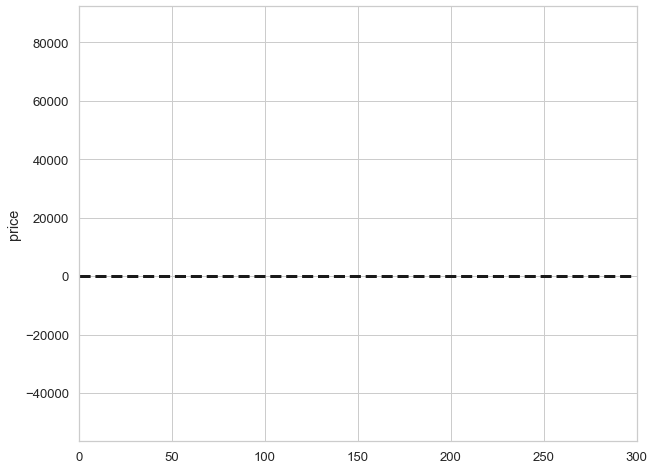

In [26]:
plt.figure( figsize = (10,8) )
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.scatterplot(x = y_predicted, y = error, color = '#658cb7'
               )
plt.plot(np.arange(300), np.zeros(300), 'k--', linewidth = 3)
plt.xlim(0,300)
plt.show()

# The End.